Mean Squared Error: 4.124164812495449e-28


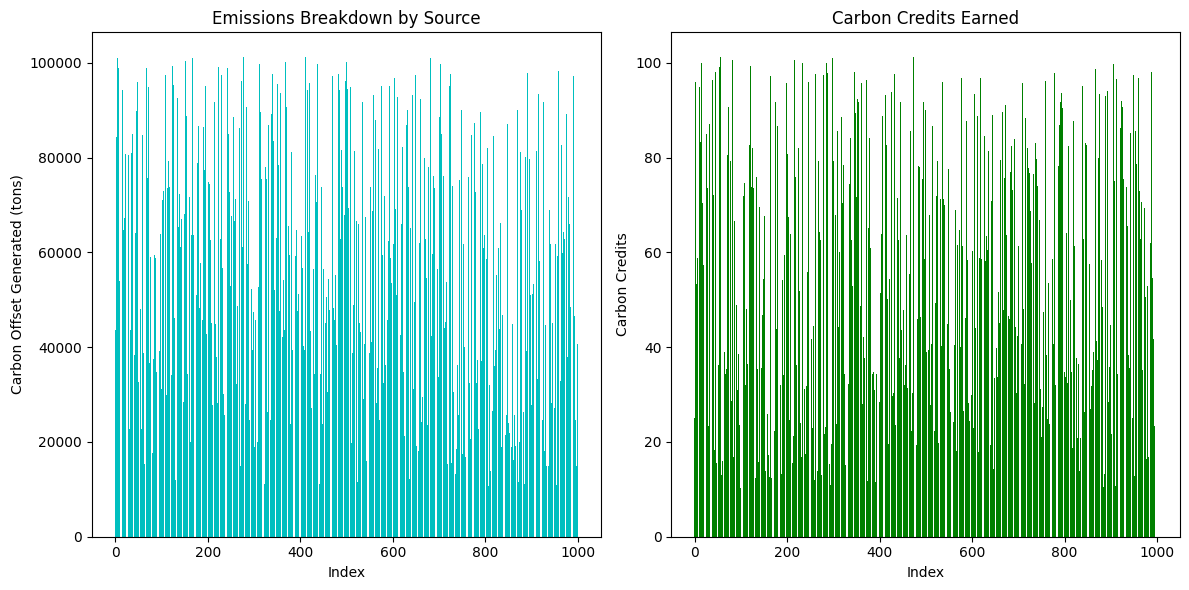

Carbon Credits Calculated:
      Carbon Offset  Carbon_Credits
0         24993.60        24.99360
1         43647.36        43.64736
2         96072.96        96.07296
3         84409.28        84.40928
4         53441.60        53.44160
..             ...             ...
995       24627.84        24.62784
996       21071.84        21.07184
997       14914.88        14.91488
998       58846.72        58.84672
999       40721.28        40.72128

[1000 rows x 2 columns]


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Read the CSV file
df = pd.read_csv('emission_dataset.csv')

# Calculate emissions for each gas
df['Emissions_CO2'] = df['Activity'] * df['Emission_Factor_CO2']
df['Emissions_CH4'] = df['Activity'] * df['Emission_Factor_CH4']
df['Emissions_N2O'] = df['Activity'] * df['Emission_Factor_N2O']
df['Emissions_HFCs'] = df['Activity'] * df['Emission_Factor_HFCs']
df['Emissions_PFCs'] = df['Activity'] * df['Emission_Factor_PFCs']
df['Emissions_SF6'] = df['Activity'] * df['Emission_Factor_SF6']

# Convert to CO2 equivalents
df['CO2_eq_CO2'] = df['Emissions_CO2'] * df['GWP_CO2']
df['CO2_eq_CH4'] = df['Emissions_CH4'] * df['GWP_CH4']
df['CO2_eq_N2O'] = df['Emissions_N2O'] * df['GWP_N2O']
df['CO2_eq_HFCs'] = df['Emissions_HFCs'] * df['GWP_HFCs']
df['CO2_eq_PFCs'] = df['Emissions_PFCs'] * df['GWP_PFCs']
df['CO2_eq_SF6'] = df['Emissions_SF6'] * df['GWP_SF6']

# Calculate total CO2 equivalent emissions
df['Carbon Offset'] = (df['CO2_eq_CO2'] + df['CO2_eq_CH4'] + df['CO2_eq_N2O'] +
                       df['CO2_eq_HFCs'] + df['CO2_eq_PFCs'] + df['CO2_eq_SF6'])

# Assuming 1 carbon credit equals 1 ton of CO2
df['Carbon_Credits'] = df['Carbon Offset'] / 1000  # Convert from kg to tons

# Prepare features and target variable
X = df[['Activity', 'Emission_Factor_CO2', 'Emission_Factor_CH4', 'Emission_Factor_N2O', 
        'Emission_Factor_HFCs', 'Emission_Factor_PFCs', 'Emission_Factor_SF6', 'GWP_CO2', 
        'GWP_CH4', 'GWP_N2O', 'GWP_HFCs', 'GWP_PFCs', 'GWP_SF6']]
y = df['Carbon_Credits']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Save the model
with open('carbonCredit_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Visualization
plt.figure(figsize=(12, 6))

# Emissions Breakdown
plt.subplot(1, 2, 1)
plt.bar(df.index, df[['CO2_eq_CO2', 'CO2_eq_CH4', 'CO2_eq_N2O', 'CO2_eq_HFCs', 'CO2_eq_PFCs', 'CO2_eq_SF6']].sum(axis=1), color='c')
plt.xlabel('Index')
plt.ylabel('Carbon Offset Generated (tons)')
plt.title('Emissions Breakdown by Source')

# Carbon Credits
plt.subplot(1, 2, 2)
plt.bar(df.index, df['Carbon_Credits'], color='g')
plt.xlabel('Index')
plt.ylabel('Carbon Credits')
plt.title('Carbon Credits Earned')

plt.tight_layout()
plt.show()

print("Carbon Credits Calculated:\n", df[['Carbon Offset', 'Carbon_Credits']])
